
The Brown Corpus is one of the earliest and most well-known collections of text used for linguistic research and natural language processing (NLP). It was compiled at Brown University in 1961 and represents a broad range of American English. The corpus is a carefully curated selection of approximately 1 million words from a wide variety of text sources, including newspapers, books, fiction, non-fiction, scientific writings, and more.

Here are some key details about the Brown Corpus:

Diversity: It covers a wide range of genres, with 500 samples of about 2,000 words each from 15 different text categories, such as news, editorial, religion, learned texts, fiction, adventure, romance, and humor.

Usage: The Brown Corpus is primarily used for linguistic research and NLP tasks, such as part-of-speech tagging, syntactic analysis, word frequency analysis, and building models like Word2Vec.

Influence: As one of the first large-scale linguistic corpora, it has influenced the development of many other corpora and remains a key resource for training and testing various NLP models.

Structure: It is tokenized and tagged with part-of-speech labels, making it ideal for tasks that require detailed linguistic information.

In the context of Word2Vec or other NLP models, the Brown Corpus provides a good variety of word usages, making it useful for training models that can understand different contexts in language.



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sample Sentence: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']

Words most similar to 'money': [('care', 0.9230092763900757), ('work', 0.8995869755744934), ('freedom', 0.892033040523529), ('job', 0.88929283618927), ('ability', 0.8853951096534729)]


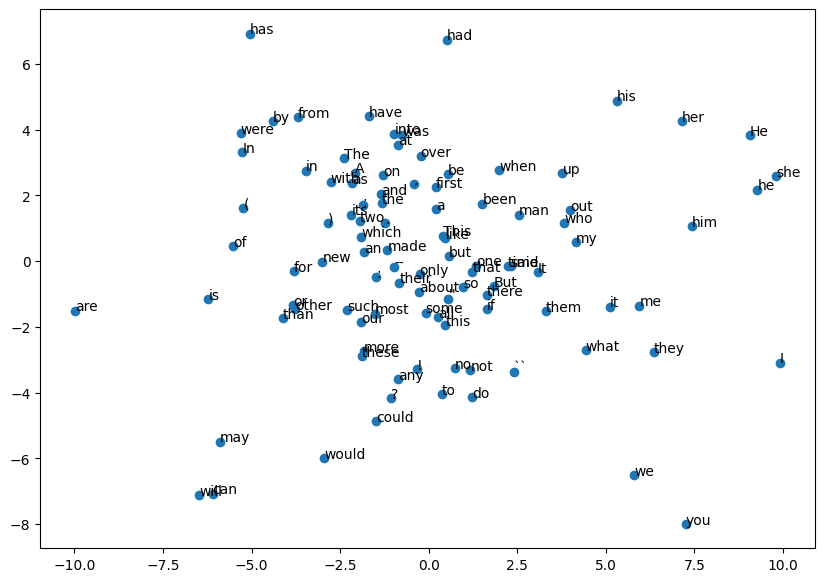

In [37]:
# Word2Vec with Gensim Example

# Importing necessary libraries
import gensim
from gensim.models import Word2Vec
from nltk.corpus import brown
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('brown')
nltk.download('punkt')

# Load corpus (for demonstration, we use the Brown corpus from NLTK)
corpus = brown.sents()

# Preprocessing: Simple tokenization (in this case, the corpus is already tokenized)
print("Sample Sentence:", corpus[0])

# Train Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=2, workers=4)

# Save the model
model.save("word2vec_brown.model")

# Load the saved model
new_model = Word2Vec.load("word2vec_brown.model")

# Find words similar to 'money'
similar_words = new_model.wv.most_similar('money', topn=5)
print("\nWords most similar to 'money':", similar_words)

# Visualize the word embeddings using PCA
words = list(new_model.wv.key_to_index)[:100]  # Take the first 50 words
word_vectors = [new_model.wv[word] for word in words]

# Reduce the dimensions with PCA
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(10, 7))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()


In [2]:
corpus

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [21]:
word1 = "pants"
word2 = "shirt"

vector1 = new_model.wv[word1] # Access the word vector using .wv
vector2 = new_model.wv[word2] # Access the word vector using .wv

In [22]:
vector1

array([-1.48320347e-02,  5.80086894e-02,  9.24598798e-02,  2.95843296e-02,
        3.23963054e-02, -9.06033590e-02,  7.00891986e-02,  1.40420347e-01,
       -3.10479235e-02, -3.25381309e-02, -2.56288480e-02, -2.05558985e-01,
        3.16712297e-02,  6.91095144e-02,  7.58124143e-02, -6.85914308e-02,
        2.89586419e-03, -2.97475010e-02, -1.53422868e-02, -9.40147415e-02,
        8.33566263e-02, -2.48100609e-02,  1.07254786e-03, -6.08794217e-05,
        1.03096673e-02, -8.46552290e-03, -6.13631532e-02,  2.42792461e-02,
       -3.41398120e-02, -1.19166626e-02,  8.14022720e-02, -6.76952675e-02,
        4.11454216e-02, -1.62220538e-01,  3.99015518e-03,  1.46153187e-02,
        4.65653688e-02,  4.43264935e-03, -1.15704574e-01, -1.25787809e-01,
        3.84001806e-02, -1.03770427e-01, -1.39105981e-02, -1.61355417e-02,
       -2.01006327e-02,  2.43679271e-03, -6.37685359e-02, -9.54759773e-03,
       -7.28622451e-02,  9.02715698e-02,  1.71839129e-02, -8.15637782e-02,
       -8.33967775e-02, -

In [23]:
# Calculate cosine similarity between the two words
similarity = new_model.wv.similarity(word1, word2)
print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")

Cosine similarity between 'pants' and 'shirt': 0.9417166709899902


In [29]:
# Calculate cosine similarity between the two words
similarity = new_model.wv.similarity('kill', 'president')
print(f"Cosine similarity: {similarity}")

Cosine similarity: 0.593906581401825


Pass Word2Vec embeddings into an LSTM model as input.

Using pre-trained word embeddings like Word2Vec in an LSTM is a common practice for NLP tasks like text classification, named entity recognition, or sentiment analysis.

Overview:
Each word in your input sequence is converted into its corresponding Word2Vec embedding.
These word embeddings are passed as a batch of inputs to the LSTM.
The LSTM processes the sequence and can output a prediction (for classification, sequence-to-sequence, etc.).

In [30]:
import gensim.downloader as api
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

# Example sentences
sentences = [
    "I love machine learning",
    "The cat is on the mat",
    "Dogs are loyal animals"
]

# Preprocessing: Tokenize and get word embeddings for each sentence
def get_word2vec_embeddings(sentence, word2vec_model, embedding_dim=300):
    embedding_matrix = []
    for word in sentence.split():
        if word in word2vec_model:
            embedding_matrix.append(word2vec_model[word])
        else:
            embedding_matrix.append(np.zeros(embedding_dim))  # Unknown words are zeros
    return np.array(embedding_matrix)

# Convert each sentence into word embeddings
embedded_sentences = [get_word2vec_embeddings(sentence, word2vec_model) for sentence in sentences]

# Pad the sequences to ensure equal length (for batching)
max_sequence_length = max([embedding.shape[0] for embedding in embedded_sentences])
padded_sentences = pad_sequences(embedded_sentences, maxlen=max_sequence_length, padding='post', dtype='float32')

# Build an LSTM model
model = Sequential()

# LSTM layer (Note: input_shape is set to the size of the embedding (300) and the max sequence length)
model.add(LSTM(128, input_shape=(max_sequence_length, 300), return_sequences=False))

# Add a Dense layer for binary classification (e.g., sentiment analysis)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Example labels (for binary classification task)
labels = np.array([1, 0, 1])  # Example: 1=positive sentiment, 0=negative sentiment

# Train the model
model.fit(padded_sentences, labels, epochs=10, batch_size=2)


[==================================================] 100.0% 1662.8/1662.8MB downloaded


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │         219,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,777 (858.50 KB)

 Trainable params: 219,777 (858.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.0000e+00 - loss: 0.7062
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.6116
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.5520 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.4931 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.4015
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.3510 
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.2452 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.1878 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.1132
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0657 


In [34]:
test_sentences = [
    "I hate grocery shopping",
    "The cat is a pain",
    "Dogs are dirty animals"
]

In [35]:
# Convert each sentence into word embeddings
embedded_test_sentences = [get_word2vec_embeddings(sentence, word2vec_model) for sentence in test_sentences]

# Pad the sequences to ensure equal length (for batching)
padded_test_sentences = pad_sequences(embedded_test_sentences, maxlen=max_sequence_length, padding='post', dtype='float32')

In [36]:
model.predict(padded_test_sentences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.83585155],
       [0.3396184 ],
       [0.95021504]], dtype=float32)